In [1]:
name = '2019-02-14-matplotlib-subplots-callum'
title = 'Better plotting with matplotlib subplots'
tags = 'matplotlib, dataviz'
author = 'Callum Rollo'

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML

html = connect_notebook_to_post(name, title, tags, author)

Today we'll be using matplotlib's pyplot to make clearer, prettier figures.

First we import packages and generate some data to plot.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Pump up the font sizes on plots. Better to do it now than when you need 10 plots for a powerpoint!

In [4]:
plt.rcParams.update({"font.size": 20})

Make 9 sine curves with random offsets and noise.

In [5]:
time = np.linspace(0, np.pi, 50)
no_of_lines = 9
x1 = np.empty((no_of_lines, len(time)))
for row in range(no_of_lines):
    x1[row, :] = np.sin(time + 2 * np.pi * np.random.rand()) + 0.2 * np.random.rand(len(time))

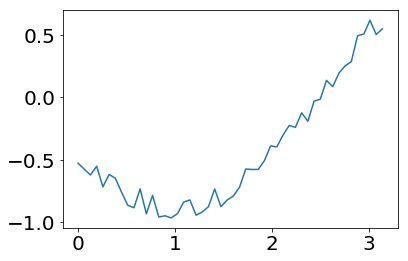

In [6]:
plt.plot(time, x1[0, :])

Now plot all of them

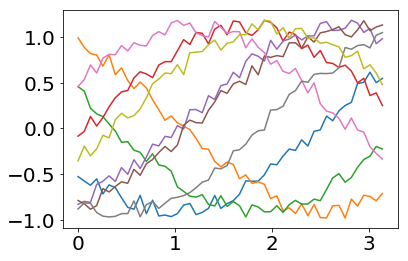

In [7]:
for row in range(no_of_lines):
    plt.plot(time, x1[row, :])

What a mess! Better off with some subplots

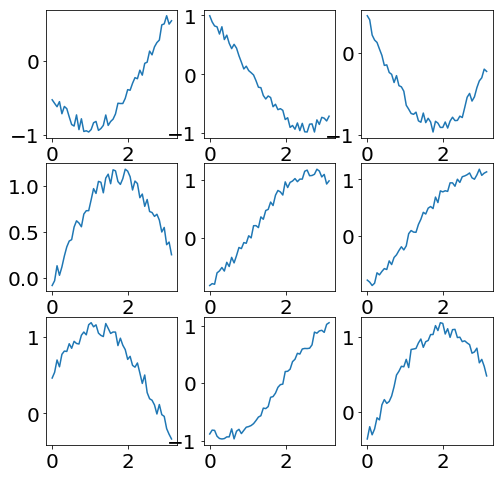

In [8]:
# Using subplots to make a 3 X 3 grid of axes for plotting
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

# ravel makes the axs object into an array of 9 objects we can access
# with indices, very handy for plotting within a loop
axs = axs.ravel()

for row in range(no_of_lines):
    axs[row].plot(time, x1[row, :])

We can improve this by sharing axis labels and reducing the space between plots

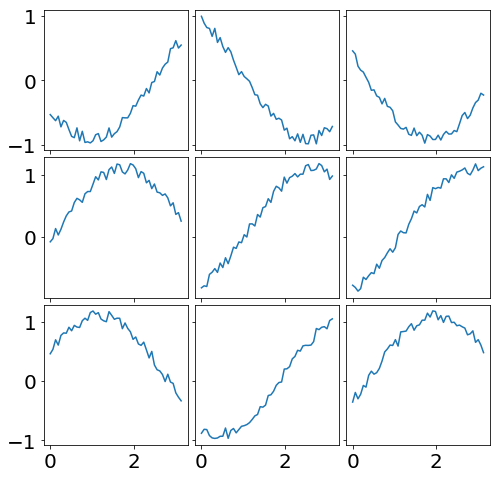

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8), sharex="col", sharey="row")
axs = axs.ravel()

fig.subplots_adjust(hspace=0.05, wspace=0.05)

for row in range(no_of_lines):
    axs[row].plot(time, x1[row, :]);

Subplots don't have to be identical. If we want we can change the relative sizes with gridspec. Especailly useful if you are mixing line and contour plots into one superfigure 

In [10]:
# Making a grid of temperature data with meshgrid

delta1 = 0.025
x1 = np.sin(np.arange(np.pi / 4, 3 * np.pi / 4, delta1))
y1 = np.arange(10, 20, delta1)
X1, Y1 = np.meshgrid(x1, y1)
temp = X1 * Y1
distance = np.linspace(0, 90, len(x1))
depth = 20 - y1

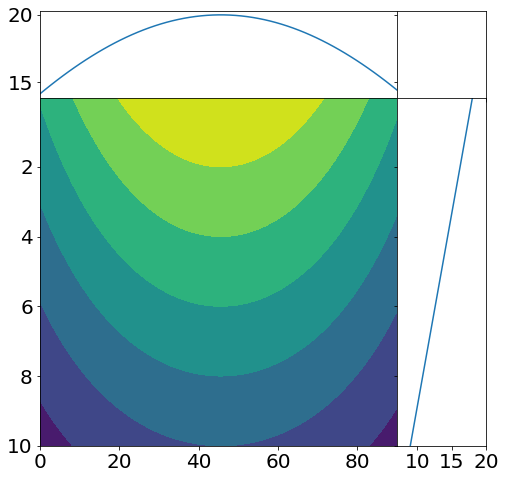

In [11]:
fig, axs = plt.subplots(
    2,
    2,
    figsize=(8, 8),
    sharex="col",
    sharey="row",
    gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]},
)
fig.subplots_adjust(hspace=0, wspace=0)
axs = axs.ravel()

# Plotting the surface temperature and mean temp depth profile alongside the contour plot of temp
axs[0].plot(distance, temp[-1, :], label="surface temp")
axs[2].contourf(distance, depth, temp)
axs[3].plot(np.nanmean(temp, 1), depth)

# Setting limits to keep things tight
axs[2].set(xlim=[distance[0], distance[-1]], ylim=[depth[0], depth[-1]])
axs[3].set(xlim=[np.min(temp), np.max(temp)]);

Some more tricks to make the plot look better

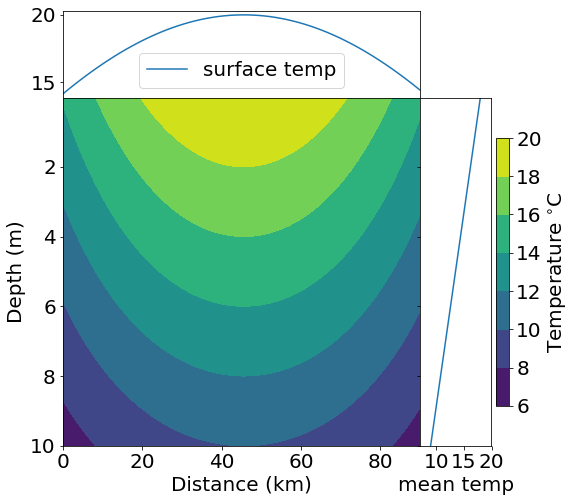

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex="col", sharey="row",
                        gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]})
fig.subplots_adjust(hspace=0, wspace=0)
axs = axs.ravel()

axs[0].plot(distance, temp[-1, :], label="surface temp")
p1 = axs[2].contourf(distance, depth, temp)
axs[3].plot(np.nanmean(temp, 1), depth)

# Add a colorbar to the right of the bottom right plot
fig.colorbar(ax=axs[3], mappable=p1, label=r"Temperature $\mathrm{^{\circ}C}$")

# Add a label to the first subplot
axs[0].legend()

# Remove the lines and ticks from the unused top right axis
axs[1].axis("off")

# Addding labels and limits
axs[2].set(
    xlim=[distance[0], distance[-1]],
    ylim=[depth[0], depth[-1]],
    ylabel="Depth (m)",
    xlabel="Distance (km)",
)
axs[3].set(xlim=[np.min(temp), np.max(temp)], xlabel="mean temp");

A few more examples can be found in this post: [More on subplots in matplotlib](https://ueapy.github.io/more-on-subplots-in-matplotlib.html).

In [13]:
HTML(html)